<a href="https://colab.research.google.com/github/yjoonjang/text-mining/blob/main/1_%E1%84%90%E1%85%A6%E1%86%A8%E1%84%89%E1%85%B3%E1%84%90%E1%85%B3_%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%8E%E1%85%A5%E1%84%85%E1%85%B5%E1%84%8B%E1%85%AA_%E1%84%8B%E1%85%AF%E1%84%83%E1%85%B3%E1%84%8F%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A1%E1%84%8B%E1%85%AE%E1%84%83%E1%85%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 텍스트 전처리와 워드클라우드
-----
워드 클라우드는 텍스트에 쓰인 단어를 빈도 분석 결과를 시각화 한 것입니다.<br>
이번 스터디에서는 텍스트 분석을 위해 텍스트 전처리를 하고 분석 후 워드 클라우드로 시각화하는 과정까지 진행해보았습니다.<br>

**학습 목표**
1. 텍스트 전처리 후 단어 토큰화하기
2. 토큰화된 단어 카운트하기
3. 워드 클라우드 만들기

In [1]:
# Konlpy 라이브러리 설치
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 29.9 MB/s eta 0:00:00


In [2]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 워드클라우드 생성을 위해 한글 폰트를 설치합니다.
# 설치 후 런타임을 다시 시작합니다.
# 상단 메뉴 '런타임' > '런타임 다시 시작'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (23.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and dir

In [3]:
# Konlpy 라이브러리 불러오기
from konlpy.tag import Okt
okt = Okt()

In [4]:
okt.pos('챗GPT 쿠버네티스 분석')

[('챗', 'Noun'),
 ('GPT', 'Alpha'),
 ('쿠버', 'Noun'),
 ('네', 'Josa'),
 ('티스', 'Noun'),
 ('분석', 'Noun')]

In [5]:
# 필요한 라이브러리 불러오기
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# 구글 드라이브 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# 파일 업로드
path = '/content/drive/MyDrive/text-mining/요즘IT_2023.04.27.csv'
df = pd.read_csv(path); df

,제목,작성자,날짜,조회수,분류,본문
0,"아마존, 네이버, 스타벅스..공룡 기업이 '커뮤니티' 하는 이유",프로덕트 세계,10시간 전,1.8K,기획,[프세 커뮤니티 리포트 #1] 요즘 핫한 기업은 왜 ‘커뮤니티’에 집중할까?\n\n...
1,﻿﻿ChatGPT로 쿠버네티스 관리하는 방법,테크유람,15시간 전,3.0K,개발,"최근 ChatGPT에 대한 관심이 뜨겁습니다. ChatGPT는 단순 개발부터 보안,..."
2,프롬프트 한 줄로 다섯 가지 컬러 만드는 ‘AI Colors’,지금 써보러 갑니다,1일 전,2.7K,디자인,챗GPT의 등장으로 서비스는 물론 업무 과정에도 많은 영향을 끼치고 있는데요. 특히...
3,데이터 주도 프로덕트 개발을 위한 실험 환경 세팅하기,요즘IT의 번역글들,1일 전,2.4K,개발,본문은 deepL을 활용해 만든 해외 번역 콘텐츠입니다. 필자인 빅터 세민(Vict...
4,클라우드 비용 최적화: 수백만 달러 절약한 쿠팡의 노력,쿠팡 엔지니어링,2일 전,7.0K,개발,국내 IT기업은 한국을 넘어 세계를 무대로 할 정도로 뛰어난 기술과 아이디어를 자랑...
...,...,...,...,...,...,...
1464,카드로 쌓은 집,매거진 입맛,2021.03.05.,1.4K,디자인,아웃소싱을 하다 보면 클라이언트 측이 보내주는 시안에서는 유난히 카드가 많이 보이는...
1465,일자리 산업이 휴먼 클라우드(human cloud)에 적응하는 방법,요즘IT의 번역글들,2021.03.04.,1.8K,기획,"우버(Uber)앱이 출시되면서,사람들은 한 번의 터치만으로도 차량을 호출할 수 있는..."
1466,마약보다 달콤한 SNS의 유혹,기획자 연주리,2021.03.04.,1.8K,기획,"""왜 유튜브를 한 번 보기 시작하면 한 시간이 넘도록 계속 보게 될까? 내가 의지박..."
1467,온라인 마케팅 동영상 만들기 2편: 온라인 플랫폼의 빅데이터를 이용하라.,익명의 삼엽충,2021.03.03.,1.6K,기획,이전 편인 ‘온라인 마케팅 동영상 만들기 1편: 5초 안에 사로잡아라.’부터 읽으면...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      1469 non-null   object
 1   작성자     1469 non-null   object
 2   날짜      1469 non-null   object
 3   조회수     1469 non-null   object
 4   분류      1468 non-null   object
 5   본문      1469 non-null   object
dtypes: object(6)
memory usage: 69.0+ KB


In [11]:
# 결측값 개수 확인
df.isnull().sum()

제목     0
작성자    0
날짜     0
조회수    0
분류     1
본문     0
dtype: int64

In [13]:
# 결측 데이터 확인
df[df['분류'].isnull()]

,제목,작성자,날짜,조회수,분류,본문
101,"요즘IT 콘텐츠, 이제 '스크랩'하세요!",요즘IT,2023.02.08.,2.5K,NaN,"안녕하세요, 요즘IT입니다. 오늘은 요즘IT 업데이트 소식을 전하러 왔는데요. 바로..."


In [14]:
# 결측치 제거
df.dropna(inplace = True)
df.reset_index(inplace= True, drop = True)

In [15]:
# Text Cleaning 연습
text = df['본문'][0]

# re는 정규표현식 라이브러리입니다.
# 정규표현식을 더 깊이 있게 알고 싶으신 분은 https://wikidocs.net/1669를 참고해주세요.

cleaned_text = re.sub('[^\s\w]', ' ', text) # \w는 문자 \s는 공백입니다. ^는 not을 의미합니다.

print('클리닝 전', text, '\n',
      '클리닝 후', cleaned_text, sep = '\n')

클리닝 전
[프세 커뮤니티 리포트 #1] 요즘 핫한 기업은 왜 ‘커뮤니티’에 집중할까?

지금으로부터 10년 전인 2013년, 아마존은 도서 추천 소셜 네트워크인 굿리즈(Goodreads)를 1억 5천만 달러에 인수했습니다. 이뿐만 아니라, 아마존은 당시에 이미 ‘책을 사랑하는 이들을 위한 커뮤니티 기반 백과사전(community-powered encyclopedia for book lovers)’을 표방하는 셸퍼리(Shelfari)라는 도서 특화 소셜 및 정보 네트워크 사이트를 보유하고 있었는데요. 이커머스업을 메인으로 하고 있던 아마존은 왜 책을 판매하는 경쟁사가 아닌 커뮤니티를 당시 어마어마한 금액에 인수했을까요?

그로부터 10년 후인 2023년, 네이버는 ‘미국판 당근’이라고 불리는 포시마크를 12억 달러에 인수했습니다. 포시마크는 커뮤니티 서비스가 결합된 미국 대표 중고 C2C 플랫폼인데요, 네이버 신사업의 올해 키워드는 ‘커뮤니티+커머스’입니다. 포시마크와 함께 단기적으로 쇼핑렌즈, 라이브커머스 등 네이버 기술을 활용해 서비스를 강화하고, 중장기적으로는 주요 기능 특성에 맞는 광고 시너지 창출 등 더욱 의미 있는 성과를 낼 수 있도록 핵심 기술과 산업을 연결해 독보적인 1위 개인간거래(C2C) 플랫폼 성장시키겠다는 비전을 내비치기도 했죠. 10년 전 아마존의 인수와 닮아있지 않나요? 커뮤니티의 미래를 내다보고 과감한 인수를 결정한 기업 행보, 그리고 그 이유. 궁금하지 않나요?

기업들이 커뮤니티에 집중하는 가장 큰 이유는 크게 세 가지입니다. 이해하기 쉽게 앞글자를 따 ‘팬,데,믹’이라고 명명해보겠습니다.

기업들이 커뮤니티에 집중하는 첫 번째 이유는 바로 ‘팬덤'입니다. 혹시 패노크라시(fanocracy)'라는 말 들어보신 적 있나요? 팬을 뜻하는 ‘fan’과 통치를 의미하는 ‘―ocracy’를 합쳐 만든 패노크라시는 '팬들을 통솔하는 조직'을 의미하는 단어로, ‘팬덤’을 만드는 기업이 진정 ‘킹덤’을 만들수 있다는 것입니다.

책 <팬덤경제학

In [16]:
# Text Cleaning
content_list = []

for k in range(len(df['본문'])):
    content = df['본문'][k]
    cleaned_content = re.sub(r'[^\s\w]', ' ', content) # cleaning
    content_list.append(cleaned_content)

In [17]:
# Cleaning 결과 저장하기
df['본문_전처리'] = content_list; df

,제목,작성자,날짜,조회수,분류,본문,본문_전처리
0,"아마존, 네이버, 스타벅스..공룡 기업이 '커뮤니티' 하는 이유",프로덕트 세계,10시간 전,1.8K,기획,[프세 커뮤니티 리포트 #1] 요즘 핫한 기업은 왜 ‘커뮤니티’에 집중할까?\n\n...,프세 커뮤니티 리포트 1 요즘 핫한 기업은 왜 커뮤니티 에 집중할까 \n\n...
1,﻿﻿ChatGPT로 쿠버네티스 관리하는 방법,테크유람,15시간 전,3.0K,개발,"최근 ChatGPT에 대한 관심이 뜨겁습니다. ChatGPT는 단순 개발부터 보안,...",최근 ChatGPT에 대한 관심이 뜨겁습니다 ChatGPT는 단순 개발부터 보안 ...
2,프롬프트 한 줄로 다섯 가지 컬러 만드는 ‘AI Colors’,지금 써보러 갑니다,1일 전,2.7K,디자인,챗GPT의 등장으로 서비스는 물론 업무 과정에도 많은 영향을 끼치고 있는데요. 특히...,챗GPT의 등장으로 서비스는 물론 업무 과정에도 많은 영향을 끼치고 있는데요 특히...
3,데이터 주도 프로덕트 개발을 위한 실험 환경 세팅하기,요즘IT의 번역글들,1일 전,2.4K,개발,본문은 deepL을 활용해 만든 해외 번역 콘텐츠입니다. 필자인 빅터 세민(Vict...,본문은 deepL을 활용해 만든 해외 번역 콘텐츠입니다 필자인 빅터 세민 Vict...
4,클라우드 비용 최적화: 수백만 달러 절약한 쿠팡의 노력,쿠팡 엔지니어링,2일 전,7.0K,개발,국내 IT기업은 한국을 넘어 세계를 무대로 할 정도로 뛰어난 기술과 아이디어를 자랑...,국내 IT기업은 한국을 넘어 세계를 무대로 할 정도로 뛰어난 기술과 아이디어를 자랑...
...,...,...,...,...,...,...,...
1463,카드로 쌓은 집,매거진 입맛,2021.03.05.,1.4K,디자인,아웃소싱을 하다 보면 클라이언트 측이 보내주는 시안에서는 유난히 카드가 많이 보이는...,아웃소싱을 하다 보면 클라이언트 측이 보내주는 시안에서는 유난히 카드가 많이 보이는...
1464,일자리 산업이 휴먼 클라우드(human cloud)에 적응하는 방법,요즘IT의 번역글들,2021.03.04.,1.8K,기획,"우버(Uber)앱이 출시되면서,사람들은 한 번의 터치만으로도 차량을 호출할 수 있는...",우버 Uber 앱이 출시되면서 사람들은 한 번의 터치만으로도 차량을 호출할 수 있는...
1465,마약보다 달콤한 SNS의 유혹,기획자 연주리,2021.03.04.,1.8K,기획,"""왜 유튜브를 한 번 보기 시작하면 한 시간이 넘도록 계속 보게 될까? 내가 의지박...",왜 유튜브를 한 번 보기 시작하면 한 시간이 넘도록 계속 보게 될까 내가 의지박...
1466,온라인 마케팅 동영상 만들기 2편: 온라인 플랫폼의 빅데이터를 이용하라.,익명의 삼엽충,2021.03.03.,1.6K,기획,이전 편인 ‘온라인 마케팅 동영상 만들기 1편: 5초 안에 사로잡아라.’부터 읽으면...,이전 편인 온라인 마케팅 동영상 만들기 1편 5초 안에 사로잡아라 부터 읽으면...


## 텍스트 토큰화

In [18]:
# Okt 활용하기 (1); 토큰화하기
text = df['본문_전처리'][0]

word_list = okt.morphs(text) # morphs는 품사 없이 모든 토큰들의 결과를 보여줍니다.
stem_word_list = okt.morphs(text, stem = True) # stem을 True로 하면 단어의 원형으로 변형한 결과를 보여줍니다.

print(word_list, stem_word_list, sep = '\n')

['프세', '커뮤니티', '리포트', '1', '요즘', '핫', '한', '기업', '은', '왜', '커뮤니티', '에', '집중', '할까', '지금', '으로부터', '10년', '전인', '2013년', '아마존', '은', '도서', '추천', '소셜', '네트워크', '인', '굿리즈', 'Goodreads', '를', '1억', '5천만', '달러', '에', '인수', '했습니다', '이뿐만', '아니라', '아마존', '은', '당시', '에', '이미', '책', '을', '사랑', '하는', '이', '들', '을', '위', '한', '커뮤니티', '기반', '백과사전', 'community', 'powered', 'encyclopedia', 'for', 'book', 'lovers', '을', '표방', '하는', '셸퍼리', 'Shelfari', '라는', '도서', '특화', '소셜', '및', '정보', '네트워크', '사이트', '를', '보유', '하고', '있었는데요', '이커머스', '업', '을', '메인', '으로', '하고', '있던', '아마존', '은', '왜', '책', '을', '판매', '하는', '경쟁', '사가', '아닌', '커뮤니티', '를', '당시', '어마어마한', '금액', '에', '인수', '했을까요', '그로', '부터', '10년', '후', '인', '2023년', '네이버', '는', '미국', '판', '당근', '이라고', '불리는', '포', '시', '마크', '를', '12억', '달러', '에', '인수', '했습니다', '포', '시', '마크', '는', '커뮤니티', '서비스', '가', '결합', '된', '미국', '대표', '중고', 'C', '2', 'C', '플랫폼', '인데', '요', '네이버', '신', '사업', '의', '올해', '키워', '드는', '커뮤니티', '커머스', '입니다', '포', '시', '마크', '와', '함께', '단', '

In [19]:
# Okt 활용하기 (2) 품사 태깅하기
pos_word_list = okt.pos(text) # pos는 단어와 품사를 모두 보여줍니다.
print(pos_word_list)

[('프세', 'Noun'), ('커뮤니티', 'Noun'), ('리포트', 'Noun'), ('1', 'Number'), ('요즘', 'Noun'), ('핫', 'Noun'), ('한', 'Josa'), ('기업', 'Noun'), ('은', 'Josa'), ('왜', 'Noun'), ('커뮤니티', 'Noun'), ('에', 'Josa'), ('집중', 'Noun'), ('할까', 'Verb'), ('지금', 'Noun'), ('으로부터', 'Josa'), ('10년', 'Number'), ('전인', 'Noun'), ('2013년', 'Number'), ('아마존', 'Noun'), ('은', 'Josa'), ('도서', 'Noun'), ('추천', 'Noun'), ('소셜', 'Noun'), ('네트워크', 'Noun'), ('인', 'Josa'), ('굿리즈', 'Noun'), ('Goodreads', 'Alpha'), ('를', 'Noun'), ('1억', 'Number'), ('5천만', 'Number'), ('달러', 'Noun'), ('에', 'Josa'), ('인수', 'Noun'), ('했습니다', 'Verb'), ('이뿐만', 'Adjective'), ('아니라', 'Adjective'), ('아마존', 'Noun'), ('은', 'Josa'), ('당시', 'Noun'), ('에', 'Josa'), ('이미', 'Adverb'), ('책', 'Noun'), ('을', 'Josa'), ('사랑', 'Noun'), ('하는', 'Verb'), ('이', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('위', 'Noun'), ('한', 'Josa'), ('커뮤니티', 'Noun'), ('기반', 'Noun'), ('백과사전', 'Noun'), ('community', 'Alpha'), ('powered', 'Alpha'), ('encyclopedia', 'Alpha'), ('for', 'Alpha'), ('book

In [20]:
# 품사로 필터링 하기
pos_list = ['Noun', 'Verb', 'Adjective'] # 원하는 품사를 선택합니다.
pos_filtered_word_list = []

for word, pos in pos_word_list: # 포스 태깅한 결과 (단어, 품사) 쌍이 나옵니다.
    if pos in pos_list: # 이 중에 품사가 pos_list에 있으면
        pos_filtered_word_list.append(word) # pos_filtered_word_list에 추가합니다.

print(pos_filtered_word_list)

['프세', '커뮤니티', '리포트', '요즘', '핫', '기업', '왜', '커뮤니티', '집중', '할까', '지금', '전인', '아마존', '도서', '추천', '소셜', '네트워크', '굿리즈', '를', '달러', '인수', '했습니다', '이뿐만', '아니라', '아마존', '당시', '책', '사랑', '하는', '이', '위', '커뮤니티', '기반', '백과사전', '표방', '하는', '셸퍼리', '도서', '특화', '소셜', '및', '정보', '네트워크', '사이트', '보유', '있었는데요', '이커머스', '업', '메인', '하고', '있던', '아마존', '왜', '책', '판매', '하는', '경쟁', '사가', '아닌', '커뮤니티', '당시', '어마어마한', '금액', '인수', '했을까요', '그로', '후', '네이버', '미국', '판', '당근', '불리는', '포', '마크', '달러', '인수', '했습니다', '포', '마크', '커뮤니티', '서비스', '결합', '된', '미국', '대표', '중고', '플랫폼', '요', '네이버', '사업', '올해', '키워', '드는', '커뮤니티', '커머스', '입니다', '포', '마크', '기적', '쇼핑', '렌즈', '라이브', '커머스', '등', '네이버', '기술', '활용', '해', '서비스', '강화하고', '중장', '기적', '주요', '기능', '특성', '맞는', '광고', '시너지', '창', '출', '등', '더욱', '의미', '있는', '성과', '낼', '수', '있도록', '핵심', '기술', '산업', '연결해', '독보', '위', '개인', '거래', '플랫폼', '성장', '시키겠다는', '비전을', '비치', '기도', '했죠', '전', '아마존', '인수', '닮아있지', '않나요', '커뮤니티', '미래', '내다보고', '과감', '인수', '결정', '기업', '행보', '그', '이유', '궁금하지', 

In [21]:
# Okt 활용하기 (3) 명사 태깅하기
noun_word_list = okt.nouns(text) #nouns는 명사만 보여줍니다.
print(noun_word_list)

['프세', '커뮤니티', '리포트', '요즘', '핫', '기업', '왜', '커뮤니티', '집중', '지금', '전인', '아마존', '도서', '추천', '소셜', '네트워크', '굿리즈', '를', '달러', '인수', '아마존', '당시', '책', '사랑', '이', '위', '커뮤니티', '기반', '백과사전', '표방', '셸퍼리', '도서', '특화', '소셜', '및', '정보', '네트워크', '사이트', '보유', '이커머스', '업', '메인', '아마존', '왜', '책', '판매', '경쟁', '사가', '커뮤니티', '당시', '금액', '인수', '그로', '후', '네이버', '미국', '판', '당근', '포', '마크', '달러', '인수', '포', '마크', '커뮤니티', '서비스', '결합', '미국', '대표', '중고', '플랫폼', '요', '네이버', '사업', '올해', '커뮤니티', '커머스', '포', '마크', '기적', '쇼핑', '렌즈', '라이브', '커머스', '등', '네이버', '기술', '활용', '서비스', '중장', '기적', '주요', '기능', '특성', '광고', '시너지', '창', '등', '더욱', '의미', '성과', '낼', '수', '핵심', '기술', '산업', '독보', '위', '개인', '거래', '플랫폼', '성장', '비치', '기도', '전', '아마존', '인수', '커뮤니티', '미래', '과감', '인수', '결정', '기업', '행보', '그', '이유', '기업', '커뮤니티', '집중', '가장', '이유', '크게', '세', '가지', '이해', '앞', '글자', '팬', '데', '믹', '명명', '기업', '커뮤니티', '집중', '첫', '이유', '바로', '팬덤', '혹시', '패', '노크', '라시', '말', '보신', '적', '팬', '뜻', '과', '통치', '의미', '를', '패', '노크', '라시', '팬', '통솔

In [22]:
# 리스트 컴프리헨션으로 품사 필터링 구현하기
word_list = okt.pos(text, stem = True)
pos_list = ['Noun', 'Verb', 'Adjective']

[word for word in word_list if word[1] in pos_list]

[('프세', 'Noun'),
 ('커뮤니티', 'Noun'),
 ('리포트', 'Noun'),
 ('요즘', 'Noun'),
 ('핫', 'Noun'),
 ('기업', 'Noun'),
 ('왜', 'Noun'),
 ('커뮤니티', 'Noun'),
 ('집중', 'Noun'),
 ('하다', 'Verb'),
 ('지금', 'Noun'),
 ('전인', 'Noun'),
 ('아마존', 'Noun'),
 ('도서', 'Noun'),
 ('추천', 'Noun'),
 ('소셜', 'Noun'),
 ('네트워크', 'Noun'),
 ('굿리즈', 'Noun'),
 ('를', 'Noun'),
 ('달러', 'Noun'),
 ('인수', 'Noun'),
 ('하다', 'Verb'),
 ('이뿌다', 'Adjective'),
 ('아니다', 'Adjective'),
 ('아마존', 'Noun'),
 ('당시', 'Noun'),
 ('책', 'Noun'),
 ('사랑', 'Noun'),
 ('하다', 'Verb'),
 ('이', 'Noun'),
 ('위', 'Noun'),
 ('커뮤니티', 'Noun'),
 ('기반', 'Noun'),
 ('백과사전', 'Noun'),
 ('표방', 'Noun'),
 ('하다', 'Verb'),
 ('셸퍼리', 'Noun'),
 ('도서', 'Noun'),
 ('특화', 'Noun'),
 ('소셜', 'Noun'),
 ('및', 'Noun'),
 ('정보', 'Noun'),
 ('네트워크', 'Noun'),
 ('사이트', 'Noun'),
 ('보유', 'Noun'),
 ('있다', 'Adjective'),
 ('이커머스', 'Noun'),
 ('업', 'Noun'),
 ('메인', 'Noun'),
 ('하다', 'Verb'),
 ('있다', 'Adjective'),
 ('아마존', 'Noun'),
 ('왜', 'Noun'),
 ('책', 'Noun'),
 ('판매', 'Noun'),
 ('하다', 'Verb'),
 ('경쟁', 'Noun')

In [27]:
# 품사로 필터링하여 워드 반환
def pos_filtering(word_list):
    pos_list = ['Noun', 'Alpha']
    pos_filtered_word_list = [word[0] for word in word_list if word[1] in pos_list]

    return pos_filtered_word_list

In [24]:
# 스테밍 + 품사 태그하기
df['본문_POS'] = df['본문_전처리'].map(lambda x: okt.pos(x, stem= True))

In [25]:
# 품사 필터 적용하기
df['본문_단어'] = df['본문_POS'].map(pos_filtering)

In [29]:
df['본문_단어']

0       [프세, 커뮤니티, 리포트, 요즘, 핫, 기업, 왜, 커뮤니티, 집중, 지금, 전인...
1       [최근, ChatGPT, 대한, 관심, ChatGPT, 단순, 개발, 보안, 업무,...
2       [챗, GPT, 의, 등장, 서비스, 업무, 과정, 영향, 끼, AI, 명령, 품질...
3       [본문, deepL, 활용, 해외, 번역, 콘텐츠, 필자, 빅터, 세민, Victo...
4       [국내, IT, 기업, 한국, 세계, 무대, 정도, 기술, 아이디어, 자랑, 이, ...
                              ...                        
1463    [아웃소싱, 클라이언트, 측, 시안, 카드, 원인, 불명, 현상, 경험, 수, 여기...
1464    [우버, Uber, 앱, 출시, 사람, 번의, 터치, 차량, 호출, 수, 능력, 그...
1465    [왜, 유튜브, 번, 보기, 시작, 시간, 계속, 내, 의지, 박약, 것, 이, 시...
1466    [이전, 편, 온라인, 마케팅, 동영상, 만들기, 편, 안, 부터, 더, 검색, 하...
1467    [우리, 인간, 곳, 집중, 수, 시간, 얼마나, 생각, 적, 인간, 집중, 시간,...
Name: 본문_단어, Length: 1468, dtype: object

In [30]:
# 워드 리스트 병합하기
word_list = sum(df['본문_단어'], [])

In [31]:
word_list

['프세',
 '커뮤니티',
 '리포트',
 '요즘',
 '핫',
 '기업',
 '왜',
 '커뮤니티',
 '집중',
 '지금',
 '전인',
 '아마존',
 '도서',
 '추천',
 '소셜',
 '네트워크',
 '굿리즈',
 'Goodreads',
 '를',
 '달러',
 '인수',
 '아마존',
 '당시',
 '책',
 '사랑',
 '이',
 '위',
 '커뮤니티',
 '기반',
 '백과사전',
 'community',
 'powered',
 'encyclopedia',
 'for',
 'book',
 'lovers',
 '표방',
 '셸퍼리',
 'Shelfari',
 '도서',
 '특화',
 '소셜',
 '및',
 '정보',
 '네트워크',
 '사이트',
 '보유',
 '이커머스',
 '업',
 '메인',
 '아마존',
 '왜',
 '책',
 '판매',
 '경쟁',
 '사가',
 '커뮤니티',
 '당시',
 '금액',
 '인수',
 '그로',
 '후',
 '네이버',
 '미국',
 '판',
 '당근',
 '포',
 '마크',
 '달러',
 '인수',
 '포',
 '마크',
 '커뮤니티',
 '서비스',
 '결합',
 '미국',
 '대표',
 '중고',
 'C',
 'C',
 '플랫폼',
 '요',
 '네이버',
 '사업',
 '올해',
 '커뮤니티',
 '커머스',
 '포',
 '마크',
 '기적',
 '쇼핑',
 '렌즈',
 '라이브',
 '커머스',
 '등',
 '네이버',
 '기술',
 '활용',
 '서비스',
 '중장',
 '기적',
 '주요',
 '기능',
 '특성',
 '광고',
 '시너지',
 '창',
 '등',
 '더욱',
 '의미',
 '성과',
 '낼',
 '수',
 '핵심',
 '기술',
 '산업',
 '독보',
 '위',
 '개인',
 '거래',
 'C',
 'C',
 '플랫폼',
 '성장',
 '비치',
 '기도',
 '전',
 '아마존',
 '인수',
 '커뮤니티',
 '미래',
 '과감',
 '인수',
 '결정',
 '기업',

In [32]:
# 단어 리스트 생성
print('총 {}개의 단어'.format(len(word_list)))

총 1261028개의 단어


## 빈도분석
----
워드 클라우드를 생성하고 이미지를 저장합니다.</br>
워드 클라우드 라이브러리만 있으면 간단하게 만들어 볼 수 있습니다. </br>
다양한 컬러와 마스크 이미지를 활용하고 싶다면</br>
https://blog.naver.com/vi_football/221775297963를 참고해주세요.

In [33]:
# 빈도분석
c = Counter(word_list)

num = 100 # 상위 100개 단어만 출력
print(c.most_common(num))

[('수', 27696), ('것', 22995), ('서비스', 8668), ('사용', 8521), ('이', 8364), ('때', 6794), ('사용자', 6469), ('때문', 6360), ('등', 6266), ('더', 6215), ('고객', 6114), ('데이터', 6033), ('를', 5778), ('그', 5227), ('기능', 5208), ('위', 5094), ('사람', 5089), ('제공', 4765), ('경우', 4705), ('앱', 4510), ('정보', 4435), ('개발', 4427), ('통해', 4387), ('디자인', 4347), ('위해', 4289), ('생각', 4270), ('제품', 4245), ('일', 4065), ('다른', 3925), ('가지', 3892), ('대한', 3770), ('의', 3745), ('활용', 3558), ('문제', 3477), ('확인', 3464), ('우리', 3395), ('방법', 3372), ('방식', 3370), ('가장', 3301), ('기업', 3283), ('말', 3118), ('점', 3115), ('시간', 3108), ('개발자', 2980), ('대해', 2925), ('하나', 2893), ('경험', 2891), ('중', 2883), ('콘텐츠', 2851), ('화면', 2812), ('과정', 2755), ('기술', 2748), ('글', 2744), ('내용', 2616), ('회사', 2615), ('선택', 2566), ('팀', 2549), ('진행', 2543), ('내', 2492), ('프로젝트', 2479), ('여러', 2470), ('분석', 2416), ('시작', 2391), ('코드', 2385), ('모든', 2372), ('상황', 2348), ('이용', 2336), ('작업', 2301), ('웹', 2210), ('알', 2194), ('개', 2183), ('플랫폼', 2175), (

In [34]:
# 불용어
stopwords = ['수', '것', '이', '때', '등', '더', '를', '그', '위', '경우', '통해', '위해', '일', '다른', '가지', '대한', '의', '대해', '중', '내', '때문']

In [35]:
# 불용어 제거 후 빈도분석
word_list = [word for word in word_list if word[0] not in stopwords]
c = Counter(word_list)

num = 100
print(c.most_common(num))

[('서비스', 8668), ('사용', 8521), ('사용자', 6469), ('고객', 6114), ('데이터', 6033), ('기능', 5208), ('사람', 5089), ('제공', 4765), ('경우', 4705), ('앱', 4510), ('정보', 4435), ('개발', 4427), ('통해', 4387), ('디자인', 4347), ('생각', 4270), ('제품', 4245), ('다른', 3925), ('가지', 3892), ('대한', 3770), ('활용', 3558), ('문제', 3477), ('확인', 3464), ('우리', 3395), ('방법', 3372), ('방식', 3370), ('가장', 3301), ('기업', 3283), ('말', 3118), ('점', 3115), ('시간', 3108), ('개발자', 2980), ('대해', 2925), ('하나', 2893), ('경험', 2891), ('콘텐츠', 2851), ('화면', 2812), ('과정', 2755), ('기술', 2748), ('글', 2744), ('회사', 2615), ('선택', 2566), ('팀', 2549), ('진행', 2543), ('프로젝트', 2479), ('여러', 2470), ('분석', 2416), ('시작', 2391), ('코드', 2385), ('모든', 2372), ('상황', 2348), ('작업', 2301), ('웹', 2210), ('알', 2194), ('개', 2183), ('플랫폼', 2175), ('부분', 2111), ('해당', 2110), ('업무', 2103), ('상품', 2103), ('요', 2073), ('실제', 2060), ('검색', 2056), ('또한', 2052), ('결과', 2034), ('관리', 2021), ('다음', 2009), ('설정', 1998), ('모두', 1986), ('설명', 1930), ('정도', 1920), ('적용', 1914), ('시스템

### 워드 클라우드 만들기

In [36]:
!pip install wordcloud
from wordcloud import WordCloud # 워드 클라우드 라이브러리 설치
word_dict = dict(c.most_common(100)) # 딕셔너리 형태로 변환

# 워드클라우드 설정하기
wc = WordCloud(font_path = 'NanumGothic.ttf',
               background_color= 'white',
               width = 3000, height = 2000,
               min_font_size = 10)

cloud = wc.generate_from_frequencies(word_dict) # 딕셔너리 형태로 저장되어 있어야 합니다.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


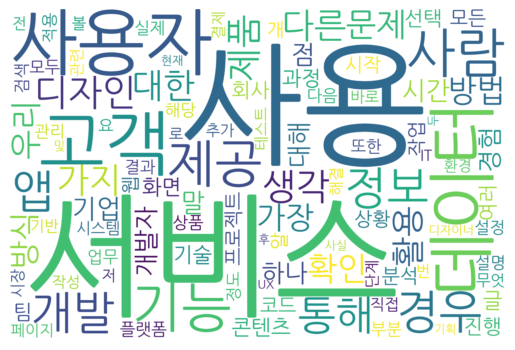

In [37]:
# 워드 클라우드 출력하기
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('요즘IT 콘텐츠 워드 클라우드.png', bbox_inches='tight', dpi = 300)

# 경로를 지정하여 구글 드라이브에 저장할 수도 있습니다.
# plt.savefig('/content/drive/MyDrive/wordcloud.png')
plt.show()

토픽별 워드 클라우드 만들기 예제
---
아래는 간단하게 토픽별로 묶어 워드 클라우드를 만들어본 예시입니다.<br>
groupby를 활용하면 리스트를 쉽게 묶을 수 있습니다.

In [38]:
topic_df = df.groupby('분류')['본문_단어'].sum().reset_index(); topic_df

,분류,본문_단어
0,개발,"[최근, ChatGPT, 대한, 관심, ChatGPT, 단순, 개발, 보안, 업무,..."
1,기획,"[프세, 커뮤니티, 리포트, 요즘, 핫, 기업, 왜, 커뮤니티, 집중, 지금, 전인..."
2,디자인,"[챗, GPT, 의, 등장, 서비스, 업무, 과정, 영향, 끼, AI, 명령, 품질..."
3,비즈니스,"[나, 지난, 몇, 년, 개발자, 코칭, 프론트, 백엔드, 를, 고민, 당신, 개발..."
4,아웃소싱,"[예비, 창업, 패키지, 청년, 창업, 사관학교, 정부, 사업, 합격자, 발표, 일..."
5,프로덕트,"[OpenAI, ChatGPT, API, 를, 공개, 후, 생, AI, 를, 적용,..."
6,프리랜싱,"[프리랜서, 개발자, 월, 급여, 얼, 마일, 프로젝트, 선택, 시, 가장, 생각,..."


In [39]:
# 데이터프레임에 불용어 제거하기
topic_df['본문_단어'] = topic_df['본문_단어'].map(lambda x: [word for word in x if word not in stopwords])

In [40]:
plt.rcParams['font.family'] = 'NanumGothic'

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


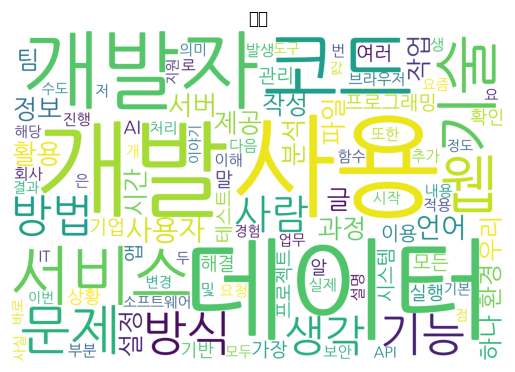

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54925 (\N{HANGUL SYLLABLE HOEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


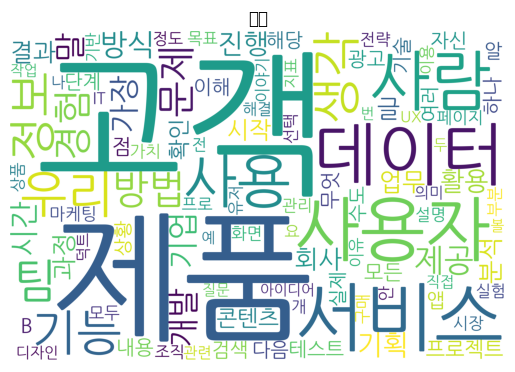

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


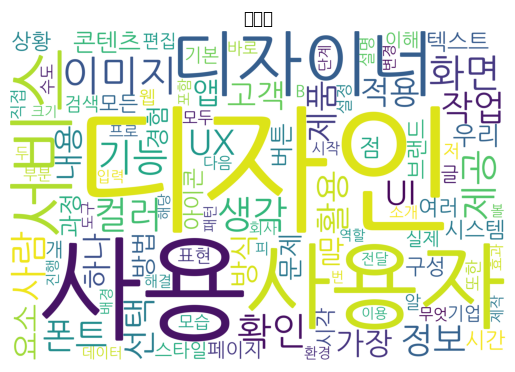

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


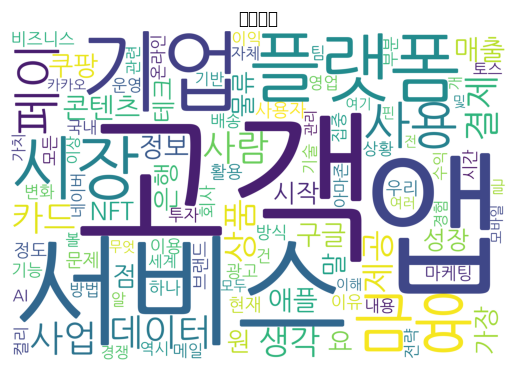

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49905 (\N{HANGUL SYLLABLE SING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


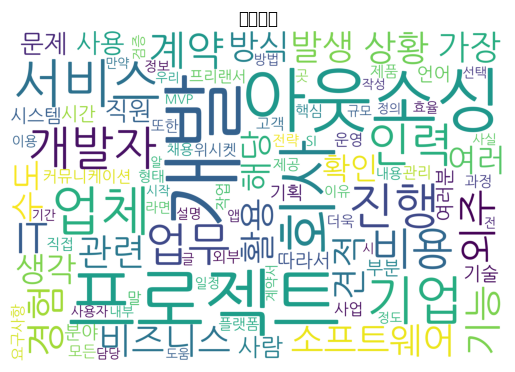

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45909 (\N{HANGUL SYLLABLE DEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


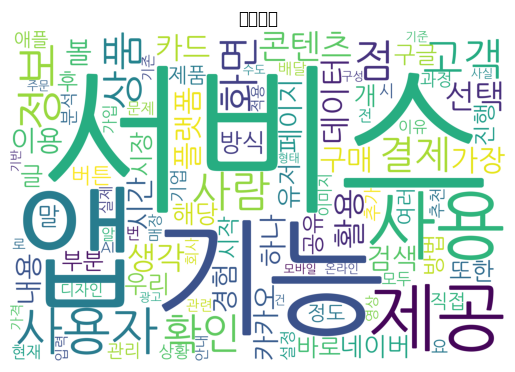

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


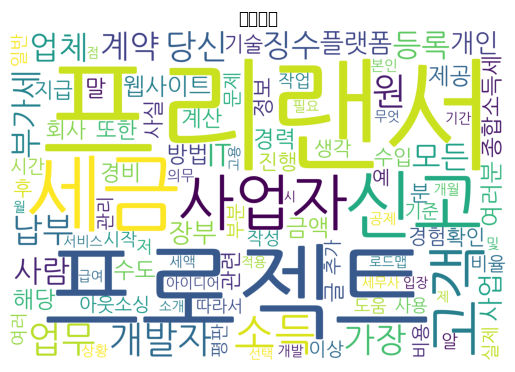

In [41]:
num = 100
for topic, word_list in zip(topic_df['분류'], topic_df['본문_단어']):
    c = Counter(word_list)
    word_dict = dict(c.most_common(num))

    # 워드클라우드 설정하기
    wc = WordCloud(font_path = 'NanumGothic.ttf',
                background_color= 'white',
                width = 3000, height = 2000,
                min_font_size = 10)

    cloud = wc.generate_from_frequencies(word_dict)
    plt.imshow(cloud)
    plt.axis("off")
    plt.title(topic)
    plt.show()